In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('50_Startups.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [21]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [ ]:
lab_enc = LabelEncoder()

In [ ]:
df.State = lab_enc.fit_transform(df.State)
df.State.unique()


array([2, 0, 1])

In [ ]:
x = df.drop(['Profit'], axis=1)
y = df['Profit']

In [ ]:
print(x.head())
print(x.shape)
print(y.head())
print(y.shape)

   R&D Spend  Administration  Marketing Spend  State
0  165349.20       136897.80        471784.10      2
1  162597.70       151377.59        443898.53      0
2  153441.51       101145.55        407934.54      1
3  144372.41       118671.85        383199.62      2
4  142107.34        91391.77        366168.42      1
(50, 4)
0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64
(50,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 45)


In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([ 51401.84171545, 158391.19888686, 179273.07922492, 154728.01058716,
       160262.50172785, 111628.94340581, 128460.59060163,  91869.77691873,
       187711.04149872, 116258.75740732, 117534.98814531, 128361.05349194,
       118061.38591843,  77718.21729548,  68870.7722883 ,  76730.76000137,
        52730.77765322])

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred )
score

0.9426922836763976

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse


126431917.01723589

In [ ]:
newdf = pd.DataFrame(y_pred, y_test)
newdf

,0
Profit,
42559.73,51401.841715
155752.60,158391.198887
191050.39,179273.079225
149759.96,154728.010587
156991.12,160262.501728
105733.54,111628.943406
134307.35,128460.590602
89949.14,91869.776919
192261.83,187711.041499


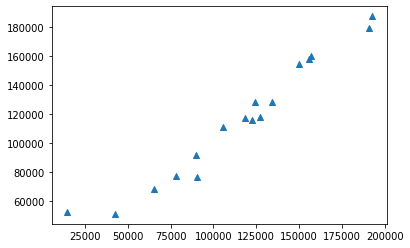

In [ ]:
plt.scatter(y_test, y_pred, marker = '^')
plt.show()